In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/Henry/Downloads/energydata_complete.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
df.drop(['date', 'lights'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaling = MinMaxScaler()

In [10]:
df_scale = scaling.fit_transform(df)

In [11]:
new_df = pd.DataFrame(df_scale, columns=df.columns)

In [12]:
X = new_df[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']]
y = new_df['Appliances']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = lm.predict(X_test)

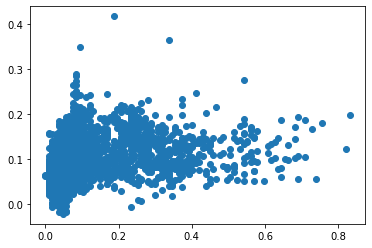

In [19]:
plt.scatter(y_test, predictions)

In [46]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['feature_weight'])

In [47]:
cdf.describe()

,feature_weight
count,26.000000
mean,0.000874
std,0.192184
min,-0.456698
25%,-0.043410
50%,0.008579
75%,0.035832
max,0.553547


In [51]:
cdf

,feature_weight
T1,-0.003281
RH_1,0.553547
T2,-0.236178
RH_2,-0.456698
T3,0.290627
RH_3,0.096048
T4,0.028981
RH_4,0.026386
T5,-0.015657
RH_5,0.016006


In [20]:
from sklearn import metrics

In [21]:
metrics.mean_absolute_error(y_test,predictions)

0.05013362397742957

In [23]:
rss = np.sum(np.square(y_test - predictions))
rss

45.34762967266378

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.08751444947661711

In [26]:
r2_score = metrics.r2_score(y_test, predictions)
r2_score

0.14890246319303524

In [27]:
from sklearn.linear_model import Ridge

In [29]:
ridge_reg = Ridge(alpha= 0.4 )
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4)

In [36]:
predictions_2 = ridge_reg.predict(X_test)

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, predictions_2))

0.08753385704628003

In [32]:
from sklearn.linear_model import Lasso

In [34]:
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [38]:
predictions_3 = lasso_reg.predict(X_test)

In [39]:
np.sqrt(metrics.mean_squared_error(y_test, predictions_3))

0.09358170467245137

In [42]:
lasso_reg.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [55]:
simple_linear_reg_df = df[['T2', 'T6' ]]

In [57]:
X_new = simple_linear_reg_df['T2']
y_new = simple_linear_reg_df['T6']

ValueError: Expected 2D array, got 1D array instead:
array=[19.2        19.2        19.2        ... 25.62857143 25.414
 25.26428571].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.